In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 37.0 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import os

In [3]:
lst1 = [os.path.join("/content/drive/MyDrive/IASNLP/hate_meme_data/img",file) for file in os.listdir("/content/drive/MyDrive/IASNLP/hate_meme_data/img")]

In [4]:
import easyocr
import time

# Initialize the EasyOCR reader with GPU acceleration
reader = easyocr.Reader(['en'], gpu=True)

# Process images using EasyOCR

st = time.time()
results = reader.readtext(lst1[0])
et= time.time()

print(st-et)
# Process OCR results
for result in results:
    print(result)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete-1.9279606342315674
([[145, 11], [603, 11], [603, 77], [145, 77]], 'trump is functionally', 0.8181328037516229)
([[292, 84], [492, 84], [492, 140], [292, 140]], 'illiterate', 0.992626239726512)
([[102, 396], [598, 396], [598, 452], [102, 452]], 'and knows almost nothing', 0.7304627700774987)
([[128, 452], [568, 452], [568, 508], [128, 508]], 'about american history', 0.9099098935958186)


In [5]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
def inpaint_text(img_path):
    print(img_path)
    # read image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Get the dimensions of the image
    height, width, channels = img.shape
    # generate (word, box) tuples
    prediction_groups = reader.readtext(img_path)
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups:
        [[x0,y0],[x1,y1],[x2,y2],[x3,y3]] = box[0]

        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
        img_name = img_path.split('/')[-1]
        cv2.imwrite(f"/content/drive/MyDrive/IASNLP/hate_meme_data/img_cleaned/{img_name}",img)

    #return(img) //undo this to test
    return

Filtering images whose object confidence Score is greater than 0 and less than 90

In [6]:
import pandas as pd
import json
json_forlder ="/content/drive/MyDrive/IASNLP/hate_meme_data/img_json"
lst2 = []

for img_json in os.listdir(json_forlder):
  majour_feature = ""
  confidence = 0
  majour_area = 0
  with open(json_forlder+'/'+img_json,'r') as file:
    data = json.load(file)
    for obj in data.keys():
      for instance in data[obj]:
        temp_area = instance['dim']['width']*instance['dim']['width']
        if temp_area > majour_area:
          majour_area = temp_area
          majour_feature = obj
          confidence = instance['confidence_score']
          lst2.append({"image":os.path.splitext(img_json)[0],"main_feature":majour_feature,"confidence_score":confidence})

df = pd.DataFrame(lst2)

In [7]:
final_list = df[(df['confidence_score']<90) & (df['confidence_score']>0)]['image'].tolist()

In [8]:
img_fld = "/content/drive/MyDrive/IASNLP/hate_meme_data/img/"
for img_path in final_list:
  #print(f"{img_fld}{img_path}")
  inpaint_text(f"{img_fld}{img_path}")

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/IASNLP/hate_meme_data/img/95036.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/15637.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/47159.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/86705.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/72486.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/35097.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/35097.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/16302.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/98314.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/98314.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/98314.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/78021.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/72054.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/72054.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/17356.png
/content/drive/MyDrive/IASNLP/hate_meme_data/img/65312.png
/cont

KeyboardInterrupt: 

In [12]:
import time
image = cv2.imread(lst1[0])


# Convert the image from BGR to RGB
image_before = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
start_time = time.time()
image_after = inpaint_text(lst1[0])
end_time = time.time()
print(start_time-end_time)


/content/drive/MyDrive/IASNLP/hate_meme_data/img/30571.png
-3.720961809158325


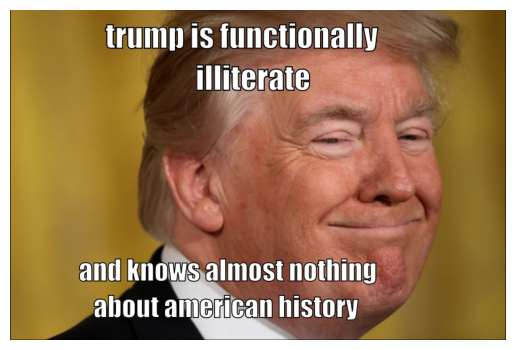

In [37]:
# Display the image
plt.imshow(image_before)
plt.axis("off")  # Turn off axis
plt.show()

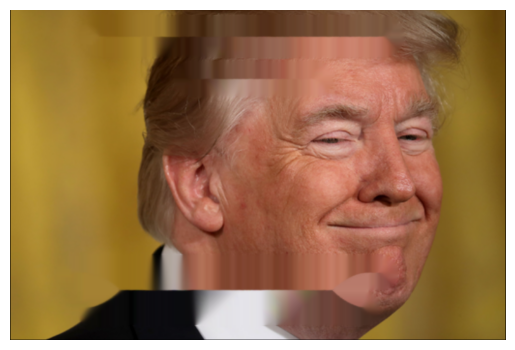

In [38]:
# Display the image
plt.imshow(image_after)
plt.axis("off")  # Turn off axis
plt.show()

In [55]:
if "/content/drive/MyDrive/IASNLP/hate_meme_data/img/10932.png" in lst1:
  print("true")

true


In [56]:
inpaint_text("/content/drive/MyDrive/IASNLP/hate_meme_data/img/10932.png")

/content/drive/MyDrive/IASNLP/hate_meme_data/img/10932.png


ValueError: Invalid input type. Supporting format = string(file path or url), bytes, numpy array